In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import os
import re

In [90]:
# Especifica el directorio donde están los archivos CSV
carpeta ="../data/raw/"

# Obtén la lista de todos los archivos en la carpeta
archivos = os.listdir(carpeta)
archivos

['RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgLargeHotelNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgLargeOfficeNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgMediumOfficeNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgMidriseApartmentNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgOutPatientNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgPrimarySchoolNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgQuickServiceRestaurantNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgSecondarySchoolNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgSmallHotelNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgSmallOfficeNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgStand-aloneRetailNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgStripMallNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE.csv',
 'RefBldgSuperMarketNew2004_v1.

In [91]:
# Define the columns to keep
columns_to_keep = [
    'Date/Time',
    'Electricity:Facility [kW](Hourly)',
    'Fans:Electricity [kW](Hourly)',
    'Cooling:Electricity [kW](Hourly)',
    'Heating:Electricity [kW](Hourly)',
    'InteriorLights:Electricity [kW](Hourly)',
    'InteriorEquipment:Electricity [kW](Hourly)'
]
# Load and concatenate data from all files
dfs = []
for file in archivos:
    df = pd.read_csv(f"../data/raw/{file}", usecols=columns_to_keep)
    df["Date/Time"] = '2004 ' + df["Date/Time"]
    date_format = '%Y %m/%d %H:%M:%S'
    df["Date/Time"] = pd.to_datetime(df["Date/Time"], format=date_format, errors='coerce')
    match = re.match(r'^[^_]+', file)
    name = match.group(0)
    df["type_building"] = name
    dfs.append(df)
# # Combine all dataframes into one
# combined_df = pd.concat(dfs, axis=0, ignore_index=True)
# # Set Date/Time as index
# combined_df.set_index('Date/Time', inplace=True)

In [92]:
dfs[0].head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.625281,3.987994,0.0,0.0,4.589925,8.1892,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.817104,0.000000,0.0,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.822138,0.000000,0.0,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.817480,0.000000,0.0,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.948340,0.000000,0.0,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004


In [93]:
dfs[0].tail()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
8755,2004-12-31 20:00:00,38.643656,3.987994,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8756,2004-12-31 21:00:00,38.622705,3.987994,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8757,2004-12-31 22:00:00,38.556918,3.987994,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8758,2004-12-31 23:00:00,38.448182,3.987994,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8759,NaT,39.250473,3.987994,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004


In [103]:
# dfs[0].resample("D").sum().head()

In [ ]:
dfs[10]["Electricity:Facility [kW](Hourly)"].resample("D").sum().plot()
plt.title('Electricity:Facility [kW](Hourly)')
plt.grid(True)
plt.show()

In [ ]:
window_size=24
window_sized=dfs[10]["Electricity:Facility [kW](Hourly)"].copy().rolling(window=window_size)
df_smoothed=window_sized.mean()
df_smoothed.plot()
plt.title('Electricity:Facility [kW](Hourly)')
plt.grid(True)
plt.show()

In [95]:
# combined_df.to_csv("combined_pdfs.csv")

## preparar caracteristicas

In [96]:
# Lista para almacenar los resultados de las estadísticas
resultados = []

# Iterar sobre cada dataframe
for df in dfs:
    # Calcular estadísticas para cada columna
    stats = {
        'type_building': df['type_building'].iloc[0],  # Tomar el tipo de edificio
    }
    for column in df.columns[1:-1]:  # Excluir la columna 'type_building'
        stats[column + '_mean'] = df[column].mean()
        stats[column + '_std_dev'] = df[column].std()
        stats[column + '_max_value'] = df[column].max()
    
    # Agregar los resultados a la lista
    resultados.append(stats)

# Convertir la lista de resultados en un dataframe
df_resultados = pd.DataFrame(resultados)

In [100]:
df_resultados.to_csv("../data/interim/estadisticas_edificios.csv",index=False)

In [101]:
df_resultados

,type_building,Electricity:Facility [kW](Hourly)_mean,Electricity:Facility [kW](Hourly)_std_dev,Electricity:Facility [kW](Hourly)_max_value,Fans:Electricity [kW](Hourly)_mean,Fans:Electricity [kW](Hourly)_std_dev,Fans:Electricity [kW](Hourly)_max_value,Cooling:Electricity [kW](Hourly)_mean,Cooling:Electricity [kW](Hourly)_std_dev,Cooling:Electricity [kW](Hourly)_max_value,Heating:Electricity [kW](Hourly)_mean,Heating:Electricity [kW](Hourly)_std_dev,Heating:Electricity [kW](Hourly)_max_value,InteriorLights:Electricity [kW](Hourly)_mean,InteriorLights:Electricity [kW](Hourly)_std_dev,InteriorLights:Electricity [kW](Hourly)_max_value,InteriorEquipment:Electricity [kW](Hourly)_mean,InteriorEquipment:Electricity [kW](Hourly)_std_dev,InteriorEquipment:Electricity [kW](Hourly)_max_value
0,RefBldgFullServiceRestaurantNew2004,36.308834,12.335170,71.257658,3.323328,1.486322,3.987994,2.429447,5.148101,28.914163,0.000000,0.000000,0.000000,7.522378,2.960208,9.179851,18.995908,7.265027,26.914700
1,RefBldgHospitalNew2004,1058.287111,245.182913,1554.471655,100.466355,9.942727,232.230537,421.814815,143.966274,609.592959,0.000000,0.000000,0.000000,132.062334,83.786843,243.259307,207.439351,81.754821,310.109712
2,RefBldgLargeHotelNew2004,277.698741,86.532167,463.971609,35.154970,2.037214,57.238307,90.653723,39.821762,152.139241,0.031855,0.190691,2.781533,46.085643,28.329880,115.409094,61.903291,23.104029,112.030105
3,RefBldgLargeOfficeNew2004,696.958175,448.026351,1814.085104,18.497322,16.702459,288.788060,118.128174,186.144307,546.329104,0.000000,0.000000,0.000000,178.726799,178.686652,448.566544,265.854193,116.539481,448.566544
4,RefBldgMediumOfficeNew2004,85.317223,53.316220,317.236343,2.124212,1.872970,8.600840,9.309202,17.542919,105.601042,13.461985,27.175434,272.310992,19.223723,19.219405,48.247488,33.819207,19.076903,70.403312
5,RefBldgMidriseApartmentNew2004,27.073199,10.150095,70.186632,1.273482,0.983684,5.444435,3.418396,5.361965,31.453364,0.000266,0.007202,0.310218,5.501517,2.989859,12.456682,14.212453,4.928750,23.314792
6,RefBldgOutPatientNew2004,154.441887,68.687564,320.348439,25.720130,5.426811,35.583725,31.483053,25.601368,131.041445,6.052312,10.414442,91.967884,17.835162,14.464077,37.101880,57.052163,41.528434,116.476156
7,RefBldgPrimarySchoolNew2004,99.486928,61.969987,342.794965,4.154527,4.865058,28.618979,10.606679,25.168607,166.170956,0.000000,0.000000,0.000000,39.099778,30.007116,80.527626,39.010294,19.674913,79.091122
8,RefBldgQuickServiceRestaurantNew2004,22.014915,7.048639,39.892004,1.830029,0.818461,2.196035,0.982258,2.172964,13.856229,0.000000,0.000000,0.000000,3.041514,1.196898,3.711679,12.980833,4.992904,18.077000
9,RefBldgSecondarySchoolNew2004,357.407942,316.486759,1253.942854,34.644319,37.119408,110.968531,128.063579,232.151379,786.372544,0.000000,0.000000,0.000000,107.247113,82.306773,220.879908,72.229137,39.117875,151.653867


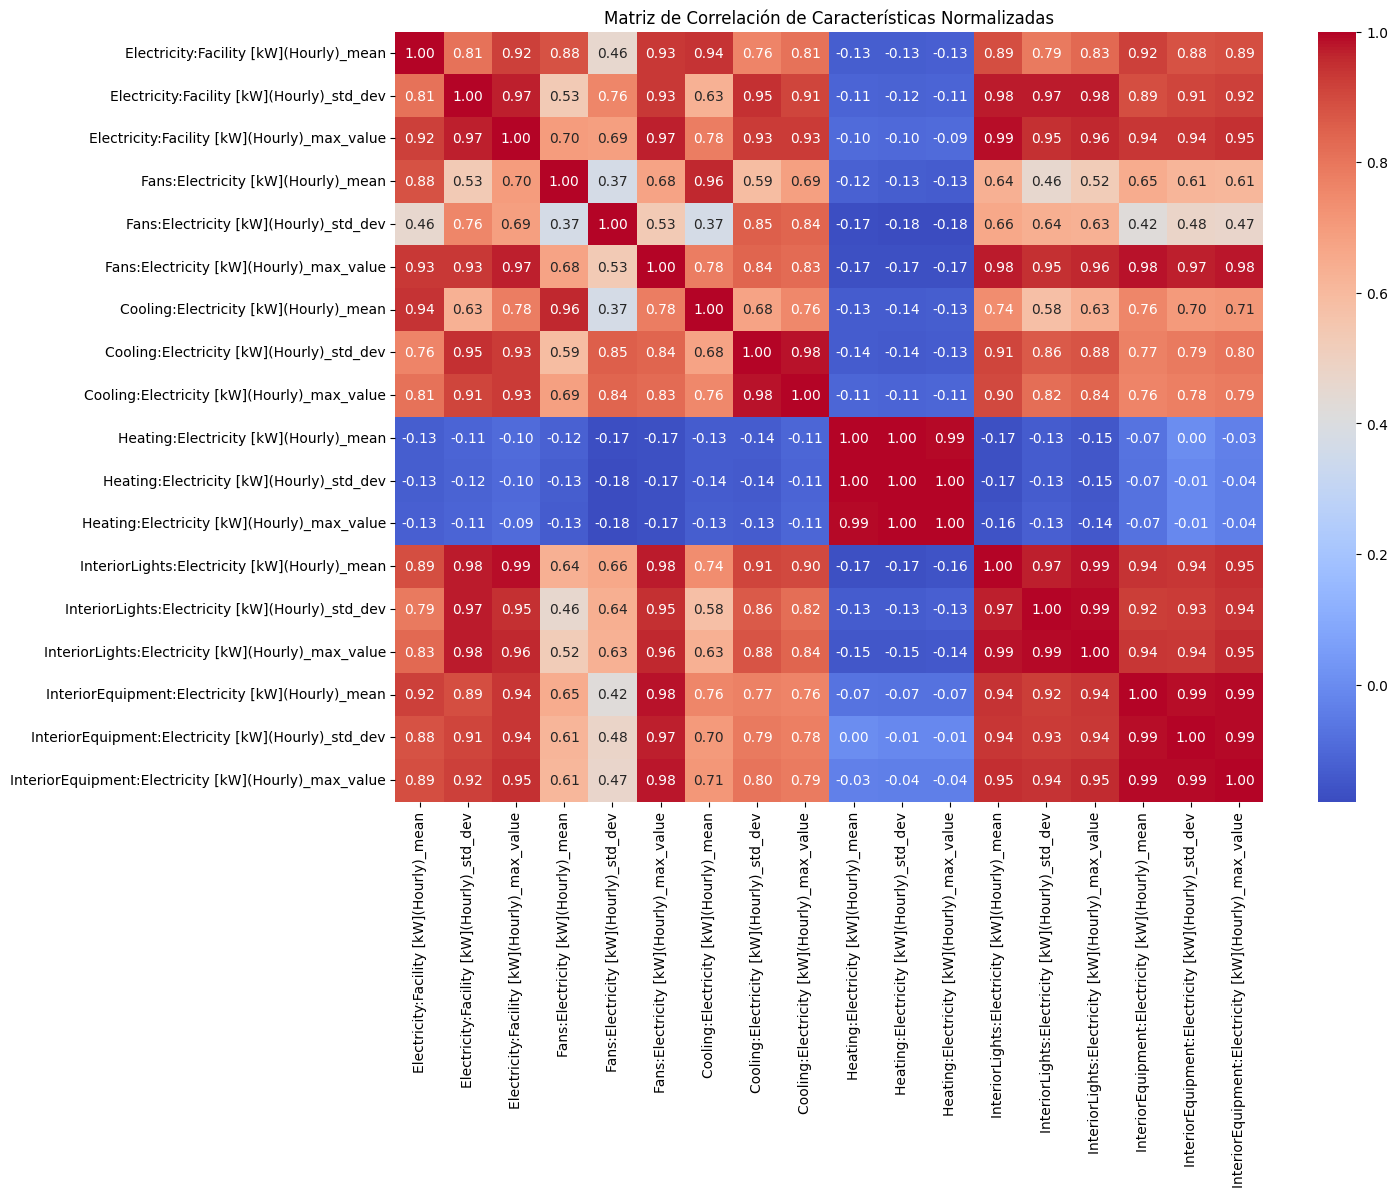

In [102]:
# Calcular la matriz de correlación
correlation_matrix = df_resultados.iloc[:,1:].corr()

# Mostrar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación de Características Normalizadas')
plt.show()